Stock Market Prediction Using ML (LinearRegression)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as py
%matplotlib inline

import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import plot

# for offline plotting
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected = True)

In [2]:
stock = pd.read_csv(r'..\Data\TATAMOTORS.NS.csv')
stock.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,01/09/2016,540.500000,546.650024,540.000000,543.650024,543.650024,7571854
1,02/09/2016,552.000000,555.900024,549.099976,549.849976,549.849976,10097146
2,06/09/2016,556.349976,593.299988,556.349976,588.700012,588.700012,15813178
3,07/09/2016,590.000000,598.400024,584.000000,587.400024,587.400024,13408927
4,08/09/2016,590.750000,591.700012,577.750000,584.200012,584.200012,10456258


In [3]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1231 entries, 0 to 1230
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1231 non-null   object 
 1   Open       1231 non-null   float64
 2   High       1231 non-null   float64
 3   Low        1231 non-null   float64
 4   Close      1231 non-null   float64
 5   Adj Close  1231 non-null   float64
 6   Volume     1231 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 67.4+ KB


In [4]:
stock['Date'] = pd.to_datetime(stock['Date'])

C:\Users\pradi\AppData\Local\Temp\ipykernel_1240\688752022.py:1: UserWarning:

Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.



In [5]:
print(f"Dataframe contains stock prices between {stock.Date.min()} {stock.Date.max()}.")
print(f"Total days = {(stock.Date.max() - stock.Date.min()).days} days.")

Dataframe contains stock prices between 2016-01-09 00:00:00 2021-12-08 00:00:00.
Total days = 2160 days.


In [6]:
stock.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1231.000000,1231.000000,1231.000000,1231.000000,1231.000000,1.231000e+03
mean,279.999269,284.017425,275.261454,279.230585,279.230585,3.298199e+07
std,136.423669,137.365521,135.096656,136.075534,136.075534,3.800965e+07
min,66.500000,66.900002,63.500000,65.300003,65.300003,1.154721e+06
25%,166.924995,170.174995,163.650002,167.000000,167.000000,7.767783e+06
50%,269.200012,271.850006,262.200012,267.049988,267.049988,1.878533e+07
75%,409.899994,413.824997,403.250000,405.449997,405.449997,4.587110e+07
max,590.750000,598.400024,584.000000,588.700012,588.700012,3.905778e+08


<AxesSubplot: >

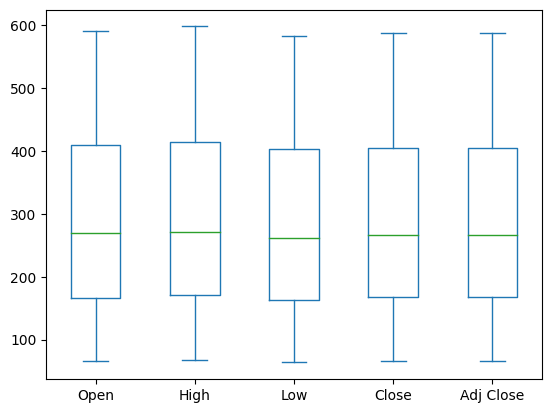

In [7]:
stock[['Open','High','Low','Close','Adj Close']].plot(kind='box')

In [8]:
#setting the layout for our plot
layout = go.Layout(
    title= "Stock Price of Tesla",
    xaxis=dict(
        title ='Date',
        titlefont = dict(
            family="Courier New, monospace",
            size=18,
            color='#7f7f7f',
        )
    ),
    yaxis=dict(
        title = 'Price',
        titlefont = dict(
            family = "Courier New, monospace",
            size = 18,
            color= '#7f7f7f'
        )
    )
)

maruti_date = [{'x':stock['Date'], 'y':stock['Close']}]
plot = go.Figure(data =maruti_date, layout=layout)

In [9]:
iplot(plot)

In [10]:
#bulding the regresstion model
from sklearn.model_selection import train_test_split

#for preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#for model evolution
from sklearn.metrics import mean_squared_error as mse 
from sklearn.metrics import r2_score


In [11]:
X = np.array(stock.index).reshape(-1,1)
Y = stock['Close']
X_train,x_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=101) 

In [12]:
#Feature scaling
scaler = StandardScaler().fit(X_train)

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
#Creating a Linear model
lm = LinearRegression()
lm.fit(X_train,Y_train)

LinearRegression()

In [15]:
trace0 = go.Scatter(
    x = X_train.T[0],
    y = Y_train,
    mode = 'markers',
    name = 'Actual'
)
trace1 = go.Scatter(
    x = X_train.T[0],
    y = lm.predict(X_train).T,
    mode = 'lines',
    name = 'Predicted'
)
maruti_data = [trace0,trace1]
layout.xaxis.title.text = 'Day'
plot2 = go.Figure(data = maruti_data,layout=layout)

In [16]:
iplot(plot2)

In [17]:
#Calculate score for model evalution
score = f'''
{'Metric'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}
{'r2_score'.ljust(10)}{r2_score(Y_train,lm.predict(X_train))}\t{r2_score(Y_test,lm.predict(x_test))}
{'MSE'.ljust(10)}{mse(Y_train, lm.predict(X_train))}\t{mse(Y_test,lm.predict(x_test))}
'''

print(score)


Metric           Train                Test        
r2_score  0.46971577196254066	0.554645632707236
MSE       9590.31782259698	8600.843722052494

